# Plots without High-K

**To-do List for Figures**
- Make gif of potential gradients with all nitride changing as the applied voltage changes
    - Field plate
    - T gate
- Benchmark IV performance out to larger value (+4V) and compare on a chart
- Benchmark peak field and compare on a chart
- Show channel plot for both field plate and T gate to illustrate when and where the peak field location changes

## Definitions

In [40]:
import matplotlib.pyplot as plt
from scipy.io import loadmat
plt.style.use('seaborn-v0_8-white') # One of the two of these styles will work. not sure why it changes.
#plt.style.use('seaborn-darkgrid')
print(plt.style.available)
import numpy as np
import pandas as pd

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [41]:
def plotFromFlooxs(IVFile, peakFile):
    
    IVFile = np.loadtxt(IVFile, delimiter=',')    
    Gate = IVFile[:,0]
    I = IVFile[:,1]

    plt.figure(figsize=[14,7]);
    plt.subplot(1,2,1)
    plt.plot(Gate, I);
    plt.title("IV")
    plt.xlabel("$V_{G} (V)$");
    plt.ylabel("$I_{DS}$ (${mA}/{cm}$)");
    plt.grid(True);

    # =============================================
    #                 Peak Field
    # =============================================
    
    peakFile = np.loadtxt(peakFile, delimiter=',')    
    Vds = peakFile[:,0]
    peakField = peakFile[:,1]

    plt.subplot(1,2,2);
    plt.plot(Vds, peakField);
    plt.title("GaN Peak Field")
    plt.xlabel("$V_{DS} (V)$");
    plt.ylabel("Electric Field (V/cm)");
    plt.grid(True);

    return Gate, I, Vds, peakField

def flooxsRead(IVFile):
    IVFile = np.loadtxt(IVFile, delimiter=',')    
    Vds = IVFile[:,0]
    I = IVFile[:,1]
    return Vds,I

## Gate voltage and Peak Field

**Nitride and HighK, GaN measurements**

'\nplt.subplot(1,2,2);\nplt.plot(fieldplate_Vds_nitride, fieldplate_peak_nitride, label="Field Plate Nitride");\nplt.plot(fieldplate_Vds_highk, fieldplate_peak_highk, label="Field Plate HfO2");\nplt.title("Peak Electric Field vs. $V_{DS}, V_{GS}=-4V$", fontsize=20);\nplt.xlabel("$V_{DS} (V)$", fontsize=20);\nplt.ylabel("$E_{peak}$ (${V}/{cm}$)", fontsize=20);\nplt.xticks(fontsize = 18)\nplt.yticks(fontsize = 18)\nplt.grid(True);\nplt.legend();\n#plt.savefig("Vt.png", dpi=300, bbox_inches=\'tight\')\nplt.show()\n'

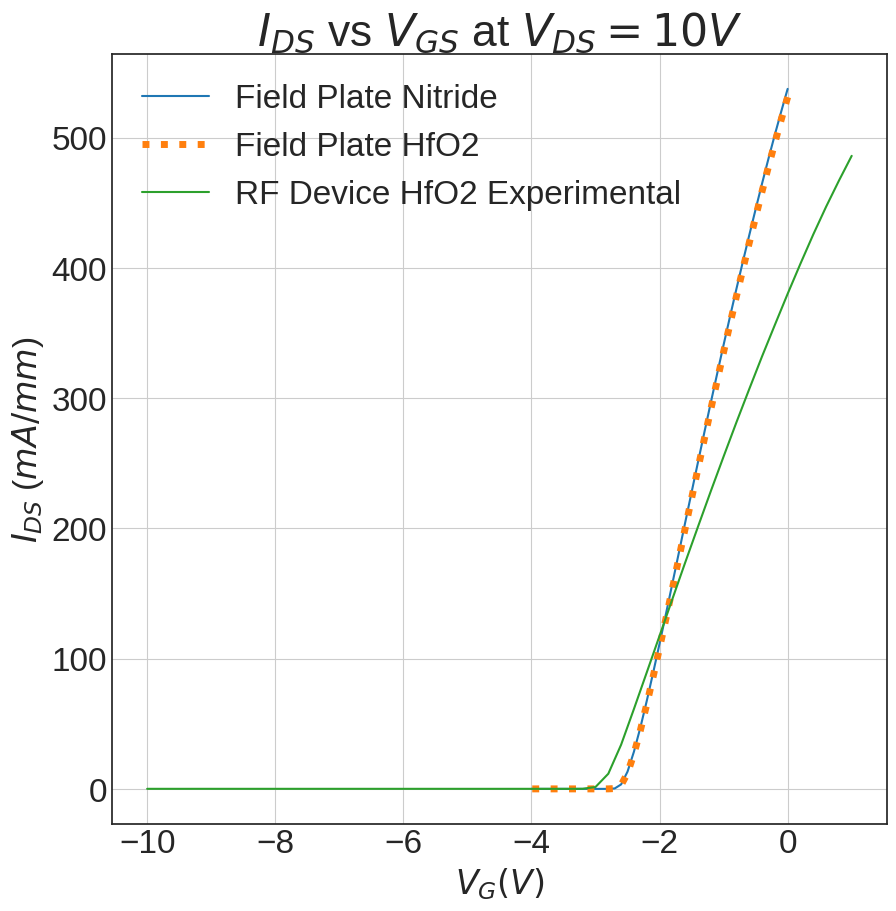

In [ ]:
fieldplate_Vgs_nitride, fieldplate_Ids_nitride = flooxsRead("/home/staffian/banjo-wombat/highK/figures/nitrideIV.csv")
fieldplate_Vgs_highk, fieldplate_Ids_highk = flooxsRead("/home/staffian/banjo-wombat/highK/figures/highkIV.csv")
exp_rfDev_Vgs, exp_rfDev_Ids = flooxsRead("/home/staffian/banjo-wombat/highK/figures/rfDeviceHFO2_Experimental.csv")


#Plotting IV
plt.figure(figsize=[10,10]);
#plt.subplot(1,2,1);
plt.plot(fieldplate_Vgs_nitride, 1000*fieldplate_Ids_nitride, label="Field Plate Nitride");
plt.plot(fieldplate_Vgs_highk, 1000*fieldplate_Ids_highk, linewidth='5', linestyle='dotted', label="Field Plate HfO2");
plt.plot(exp_rfDev_Vgs, 3000*exp_rfDev_Ids, label="RF Device HfO2 Experimental");
plt.title("$I_{DS}$ vs $V_{GS}$ at $V_{DS}=10V$", fontsize=32);
plt.xlabel("$V_{G} (V)$", fontsize=24);
plt.ylabel("$I_{DS}$ (${mA}/{mm}$)", fontsize=24);
plt.xticks(fontsize = 24)
plt.yticks(fontsize = 24)
plt.grid(True);
plt.legend(fontsize=24)
#plt.savefig("Vt.png", dpi=300, bbox_inches='tight')
#Plotting Peak Field
fieldplate_Vds_nitride, fieldplate_peak_nitride = flooxsRead("/home/staffian/banjo-wombat/highK/figures/nitrideField_GaN.csv")
fieldplate_Vds_highk, fieldplate_peak_highk = flooxsRead("/home/staffian/banjo-wombat/highK/figures/highkField_GaN.csv")
'''
plt.subplot(1,2,2);
plt.plot(fieldplate_Vds_nitride, fieldplate_peak_nitride, label="Field Plate Nitride");
plt.plot(fieldplate_Vds_highk, fieldplate_peak_highk, label="Field Plate HfO2");
plt.title("Peak Electric Field vs. $V_{DS}, V_{GS}=-4V$", fontsize=20);
plt.xlabel("$V_{DS} (V)$", fontsize=20);
plt.ylabel("$E_{peak}$ (${V}/{cm}$)", fontsize=20);
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.grid(True);
plt.legend();
#plt.savefig("Vt.png", dpi=300, bbox_inches='tight')
plt.show()
'''

Power Device (pGaN Enhancement Mode)

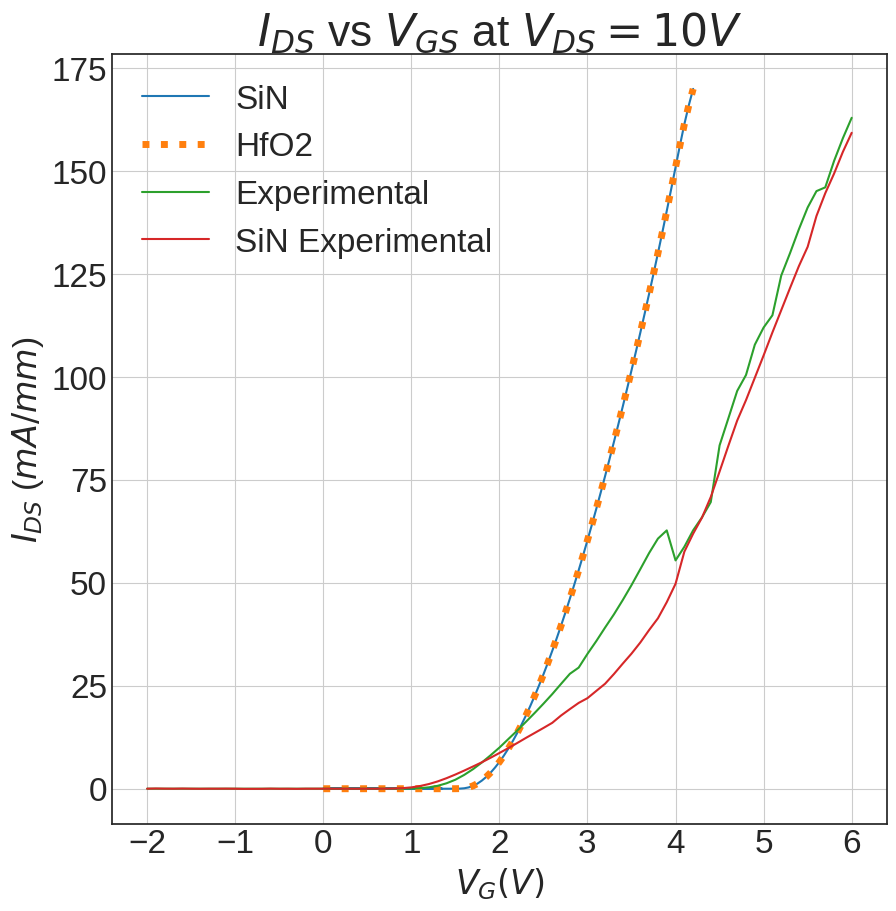

In [47]:
powerDev_Vgs, powerDev_Ids = flooxsRead("/home/staffian/banjo-wombat/highK/figures/powerIV.csv")
SiN_powerDev_Vgs, SiN_powerDev_Ids = flooxsRead("/home/staffian/banjo-wombat/highK/figures/SiNpowerIV.csv")
exp_powerDev_Vgs, exp_powerDev_Ids = flooxsRead("/home/staffian/banjo-wombat/highK/figures/powerDeviceHF02_Experimental.csv")
exp_SiN_powerDev_Vgs, exp_SiN_powerDev_Ids = flooxsRead("/home/staffian/banjo-wombat/highK/figures/powerDeviceSiN_Experimental.csv")
plt.figure(figsize=[10,10]);

plt.plot(SiN_powerDev_Vgs, 0.1*SiN_powerDev_Ids, label="SiN");
plt.plot(powerDev_Vgs, 0.1*powerDev_Ids, linewidth='5', linestyle='dotted', label="HfO2");
plt.plot(exp_powerDev_Vgs, 1000*exp_powerDev_Ids, label="Experimental");
plt.plot(exp_SiN_powerDev_Vgs, 1000*exp_SiN_powerDev_Ids, label="SiN Experimental");
plt.title("$I_{DS}$ vs $V_{GS}$ at $V_{DS}=10V$", fontsize=32);
plt.xlabel("$V_{G} (V)$", fontsize=24);
plt.ylabel("$I_{DS}$ (${mA}/{mm}$)", fontsize=24);
plt.xticks(fontsize = 24)
plt.yticks(fontsize = 24)
plt.grid(True);
plt.legend(fontsize=24);
#plt.savefig("Vt.png", dpi=300, bbox_inches='tight')
plt.show()

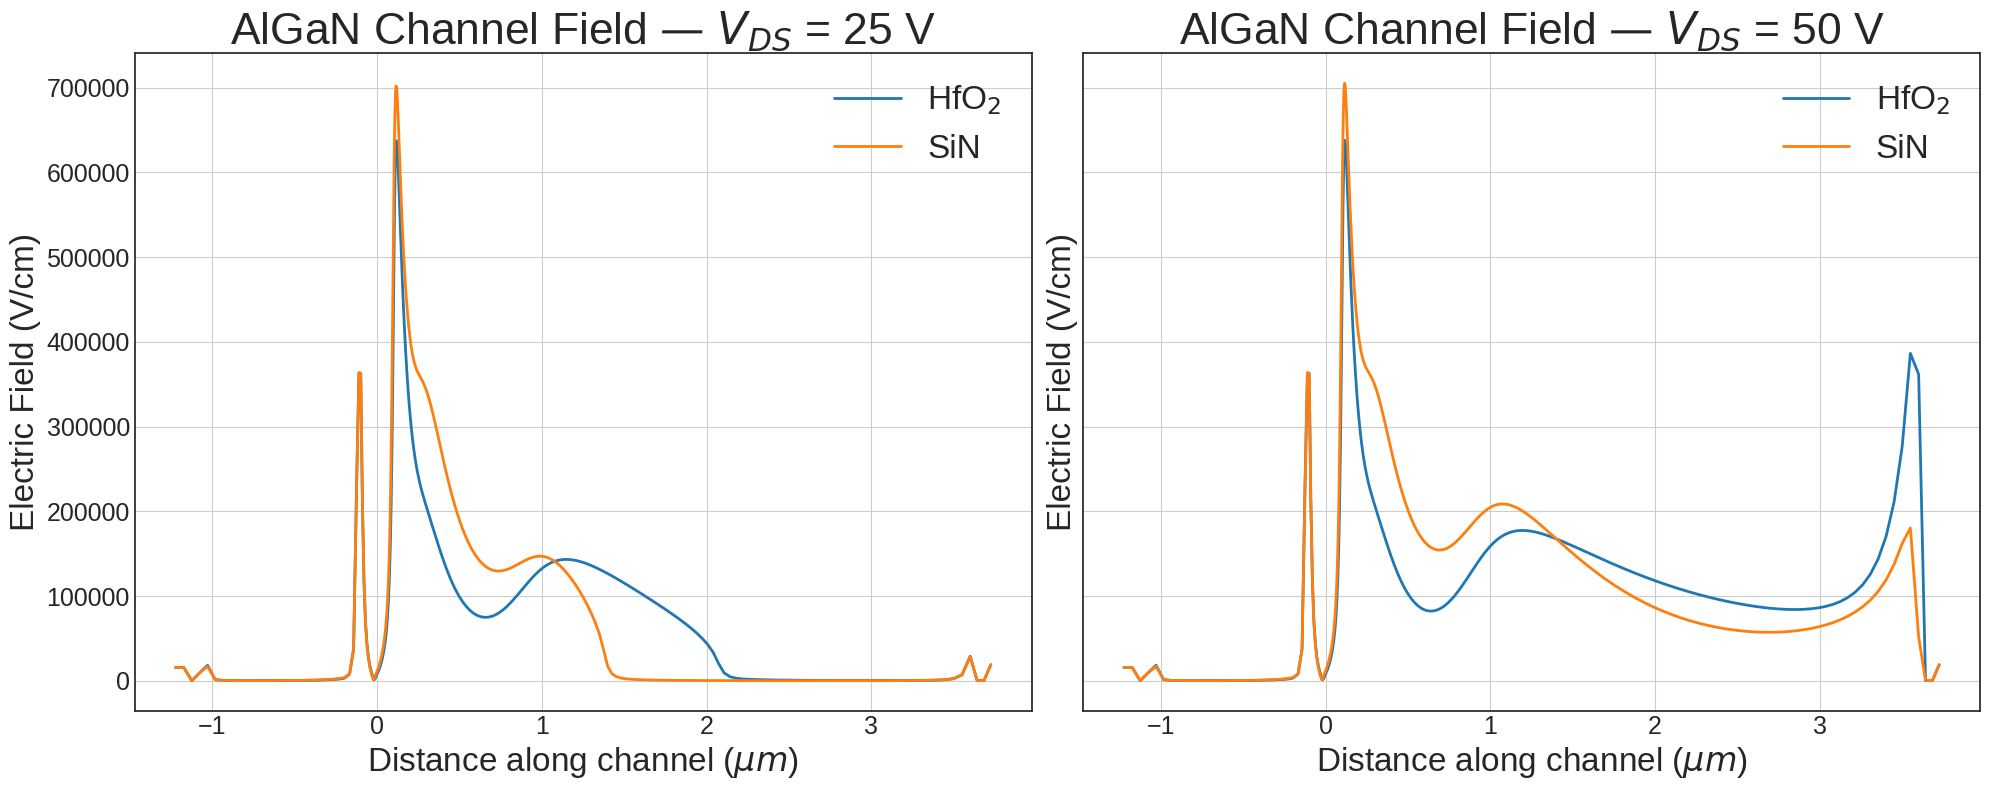

In [44]:
import re

def read_channel_csv(filepath):
    """Read FloOXS channel CSV with multiple voltage sections."""
    sections = []
    current_section = []
    
    with open(filepath, 'r') as f:
        for line in f:
            line = line.strip()
            if not line:
                if current_section:
                    sections.append(current_section)
                    current_section = []
                continue
            if 'Distance' in line:
                continue
            # Parse: { value  value  material }
            m = re.match(r'\{\s*([\d.eE+-]+)\s+([\d.eE+-]+)\s+(\w+)\s*\}', line)
            if m:
                current_section.append((float(m.group(1)), float(m.group(2)), m.group(3)))
    if current_section:
        sections.append(current_section)
    return sections

# Voltage values correspond to every 25V from 0 to 50 (Vds = 0, 25, 50)
vds_values = [0, 25, 50]

# =============================================
#  Read both datasets
# =============================================
highk_sections = read_channel_csv("/home/staffian/banjo-wombat/highK/figures/highK_channel.csv")
sin_sections = read_channel_csv("/home/staffian/banjo-wombat/highK/figures/SiN_channel.csv")

fig, axes = plt.subplots(1, 2, figsize=[20, 8], sharey=True)

# Plot Vds=25V (index 1) and Vds=50V (index 2), AlGaN only
for ax, vds_idx, vds in zip(axes, [1, 2], [25, 50]):
    for sec, label in zip([highk_sections[vds_idx], sin_sections[vds_idx]],
                          ["HfO$_2$", "SiN"]):
        distances = np.array([row[0] for row in sec if row[2] == 'AlGaN'])
        field = np.array([row[1] for row in sec if row[2] == 'AlGaN'])
        ax.plot(distances, field, label=label, linewidth=2)

    ax.set_xlabel("Distance along channel ($\\mu m$)", fontsize=24)
    ax.set_ylabel("Electric Field (V/cm)", fontsize=24)
    ax.set_title(f"AlGaN Channel Field — $V_{{DS}}$ = {vds} V", fontsize=32)
    ax.tick_params(labelsize=18)
    ax.legend(fontsize=24)
    ax.grid(True)

plt.tight_layout()
plt.show()

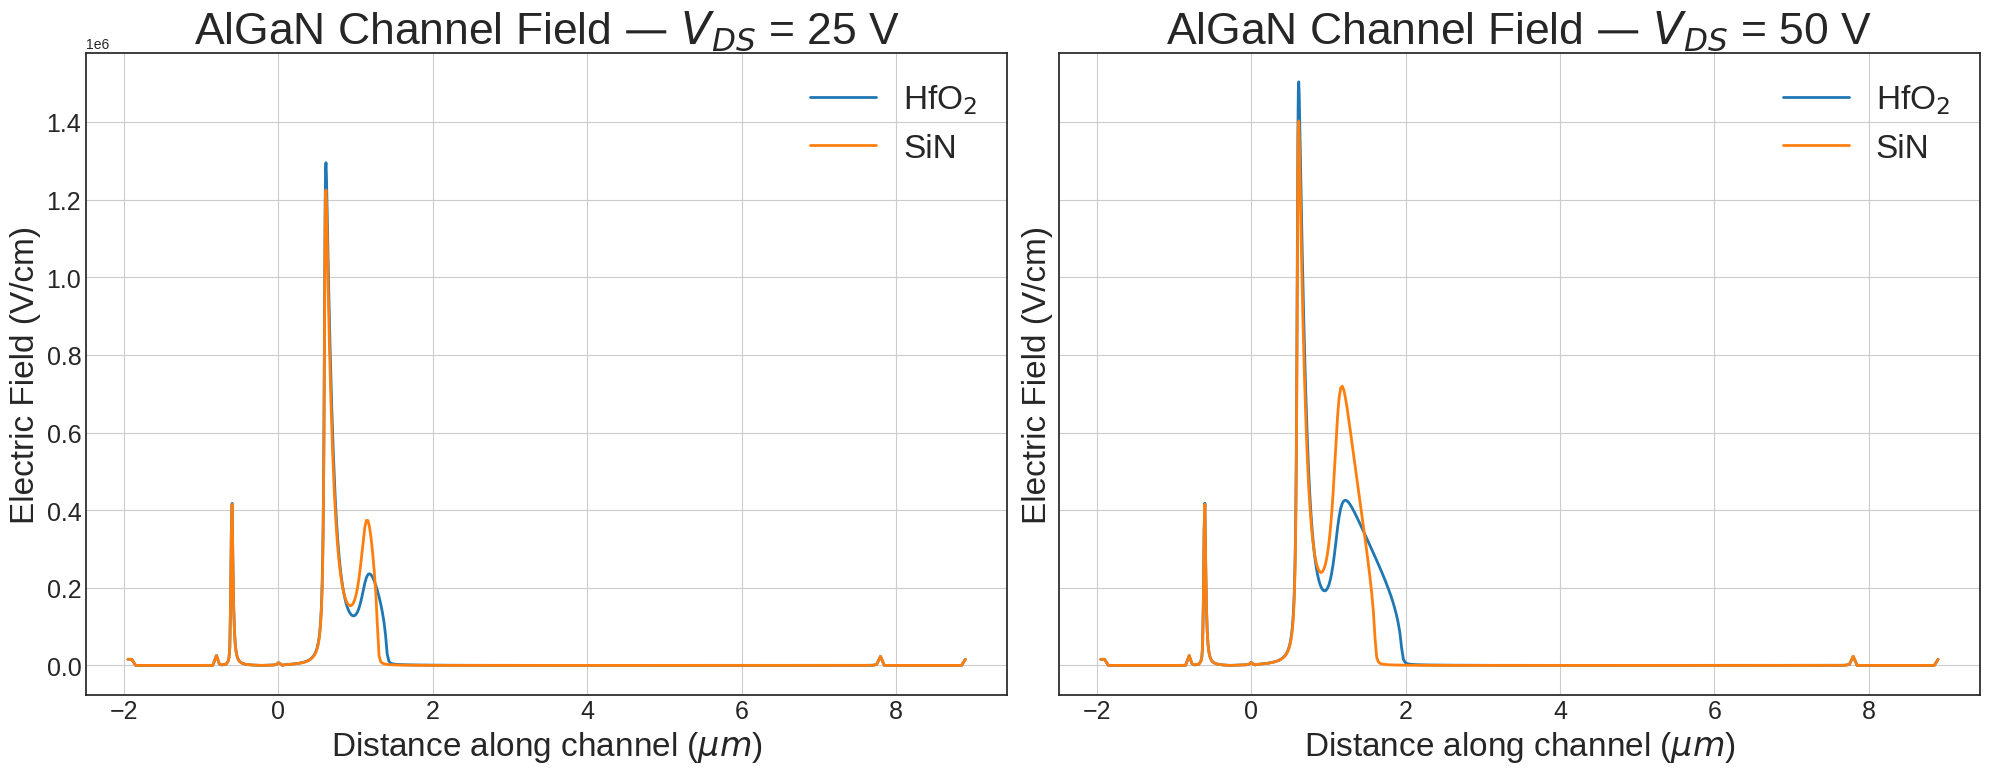

In [45]:
import re

def read_channel_csv(filepath):
    """Read FloOXS channel CSV with multiple voltage sections."""
    sections = []
    current_section = []
    
    with open(filepath, 'r') as f:
        for line in f:
            line = line.strip()
            if not line:
                if current_section:
                    sections.append(current_section)
                    current_section = []
                continue
            if 'Distance' in line:
                continue
            # Parse: { value  value  material }
            m = re.match(r'\{\s*([\d.eE+-]+)\s+([\d.eE+-]+)\s+(\w+)\s*\}', line)
            if m:
                current_section.append((float(m.group(1)), float(m.group(2)), m.group(3)))
    if current_section:
        sections.append(current_section)
    return sections

# Voltage values correspond to every 25V from 0 to 50 (Vds = 0, 25, 50)
vds_values = [0, 25, 50]

# =============================================
#  Read both datasets
# =============================================
highk_sections = read_channel_csv("/home/staffian/banjo-wombat/highK/figures/highK_power_channel.csv")
sin_sections = read_channel_csv("/home/staffian/banjo-wombat/highK/figures/SiN_power_channel.csv")

fig, axes = plt.subplots(1, 2, figsize=[20, 8], sharey=True)

# Plot Vds=25V (index 1) and Vds=50V (index 2), AlGaN only
for ax, vds_idx, vds in zip(axes, [1, 2], [25, 50]):
    for sec, label in zip([highk_sections[vds_idx], sin_sections[vds_idx]],
                          ["HfO$_2$", "SiN"]):
        distances = np.array([row[0] for row in sec if row[2] == 'AlGaN'])
        field = np.array([row[1] for row in sec if row[2] == 'AlGaN'])
        ax.plot(distances, field, label=label, linewidth=2)

    ax.set_xlabel("Distance along channel ($\\mu m$)", fontsize=24)
    ax.set_ylabel("Electric Field (V/cm)", fontsize=24)
    ax.set_title(f"AlGaN Channel Field — $V_{{DS}}$ = {vds} V", fontsize=32)
    ax.tick_params(labelsize=18)
    ax.legend(fontsize=24)
    ax.grid(True)

plt.tight_layout()
plt.show()